In [1]:
import pandas as pd
import numpy as np

import os
import sys
import warnings
warnings.filterwarnings("ignore")
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore" # Also affect subprocesse
 
from dataset import engine, RFM, Churn, Engagement

In [ ]:
import sqlalchemy
with engine.connect() as db:
	query = sqlalchemy.text(
		'''
		SELECT * FROM engagement;
		''')
	fetched = pd.DataFrame(db.execute(query).fetchall())
	db.close()


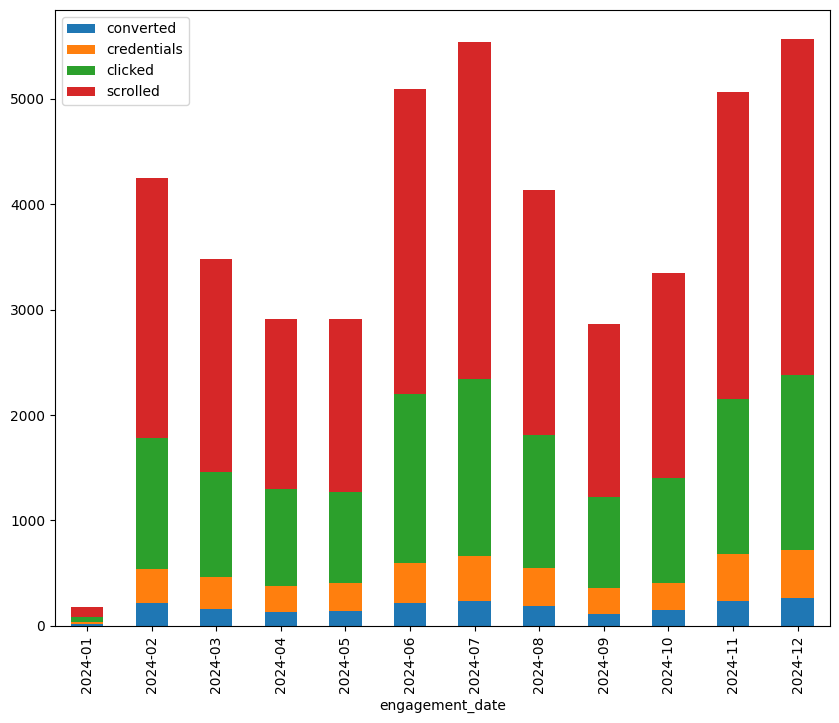

In [142]:
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))

df_new = fetched[fetched['engagement_date'] >= fetched['engagement_date'].max() - relativedelta(months=11)]
df_new.set_index('engagement_date', inplace=True)
df_new = df_new \
	.groupby([df_new.index.to_period("M"), 'action_type']) \
	.agg(['count'])['customer_id'] \
	.reset_index() \
	.pivot(index="engagement_date", columns="action_type", values="count") \
	.loc[:, ['converted', 'credentials', 'clicked', 'scrolled']]
df_new.plot(kind='bar', stacked=True, ax=ax)
plt.legend()
# df_new

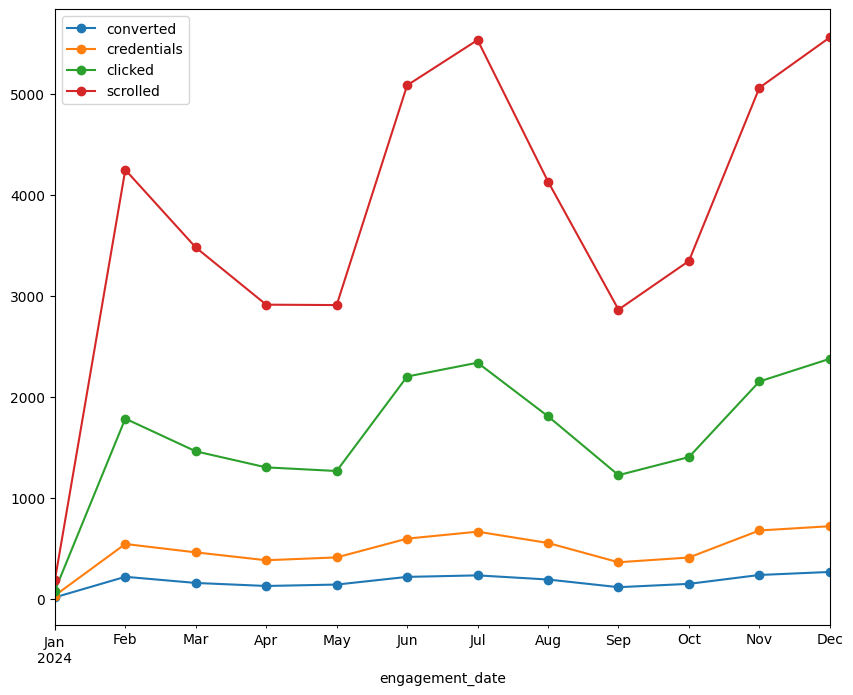

In [143]:
fig, ax = plt.subplots(figsize=(10, 8))
df_new.plot(kind='line', stacked=True, linestyle='-', marker='o', ax=ax)
plt.legend()